### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
# Dataset Overview
print("Dataset shape:", data.shape)
print("Columns:", list(data.columns))

Dataset shape: (12684, 26)
Columns: ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [14]:
# Check for specific data quality issues
print("Potential data quality issues:")
print("="*40)

issues = []


Potential data quality issues:


In [ ]:
# Decide what to do about missing data
print("Missing data analysis and decisions:")
print("="*50)

# First, let's see the missing data again
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if not missing_df.empty:
    print("Columns with missing data:")
    print(missing_df)
    
    print("\nDecision strategy:")
    for col in missing_df.index:
        missing_pct = missing_df.loc[col, 'Percentage']
        missing_count = missing_df.loc[col, 'Missing Count']
        
        print(f"\n{col}:")
        print(f"  Missing: {missing_count} ({missing_pct:.1f}%)")
        
        if missing_pct > 70:
            print(f"  Decision: DROP column - too much missing data (>{missing_pct:.1f}%)")
        elif missing_pct > 30:
            print(f"  Decision: INVESTIGATE further - significant missing data")
            print(f"  Options: Drop column, impute with mode/median, or create 'Unknown' category")
        elif missing_pct > 5:
            print(f"  Decision: IMPUTE - manageable missing data")
            if data[col].dtype == 'object':
                print(f"  Method: Fill with mode or create 'Unknown' category")
            else:
                print(f"  Method: Fill with median or mean")
        else:
            print(f"  Decision: DROP rows - very few missing values (<5%)")
    
    # Create cleaned dataset (keeping original data unchanged)
    print("\nImplementing cleaning strategy:")
    data_cleaned = data.copy()
    
    for col in missing_df.index:
        missing_pct = missing_df.loc[col, 'Percentage']
        
        if missing_pct > 70:
            print(f"Dropping column: {col}")
            data_cleaned = data_cleaned.drop(columns=[col])
        elif missing_pct <= 5:
            print(f"Dropping rows with missing {col}")
            data_cleaned = data_cleaned.dropna(subset=[col])
        else:
            if data[col].dtype == 'object':
                mode_value = data[col].mode().iloc[0] if not data[col].mode().empty else 'Unknown'
                print(f"Filling {col} with mode: '{mode_value}'")
                data_cleaned[col] = data_cleaned[col].fillna(mode_value)
            else:
                median_value = data[col].median()
                print(f"Filling {col} with median: {median_value}")
                data_cleaned[col] = data_cleaned[col].fillna(median_value)
    
    print(f"\nOriginal dataset shape: {data.shape}")
    print(f"Cleaned dataset shape: {data_cleaned.shape}")
    print(f"Rows removed: {data.shape[0] - data_cleaned.shape[0]}")
    print(f"Columns removed: {data.shape[1] - data_cleaned.shape[1]}")
    
    # Verify no missing data remains
    remaining_missing = data_cleaned.isnull().sum().sum()
    print(f"Remaining missing values: {remaining_missing}")
    
else:
    print("No missing data found in the dataset!")
    data_cleaned = data.copy()

In [16]:
# Check for unusual patterns in categorical data
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_vals = data[col].dropna().astype(str).unique()
    # Check for potential case/spacing inconsistencies
    cleaned_vals = [val.strip().lower() for val in unique_vals]
    if len(set(cleaned_vals)) != len(unique_vals):
        issues.append(f"Column '{col}' may have case/spacing inconsistencies")

if issues:
    for i, issue in enumerate(issues, 1):
        print(f"{i}. {issue}")
else:
    print("No major data quality issues detected.")

1. Columns with >1% missing values: ['car', 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20']


In [18]:
# Analyze categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns analysis:")
print("="*40)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {data[col].nunique()}")
    print(f"  Missing values: {data[col].isnull().sum()}")
    if data[col].nunique() <= 15:  # Show value counts for columns with reasonable number of unique values
        print(f"  Value counts:")
        print(data[col].value_counts())

Categorical columns analysis:

destination:
  Unique values: 3
  Missing values: 0
  Value counts:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

passanger:
  Unique values: 4
  Missing values: 0
  Value counts:
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

weather:
  Unique values: 3
  Missing values: 0
  Value counts:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

time:
  Unique values: 5
  Missing values: 0
  Value counts:
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

coupon:
  Unique values: 5
  Missing values: 0
  Value counts:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

expiration:
  Unique values: 2
  Missing values: 0
  Value counts:

In [19]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(data)*100):.2f}%")

Duplicate rows: 74
Percentage of duplicates: 0.58%


In [20]:
# Data types analysis
print("Data types:")
print(data.dtypes)
print(f"\nTotal columns: {len(data.columns)}")
print(f"Object (categorical) columns: {len(data.select_dtypes(include=['object']).columns)}")
print(f"Numerical columns: {len(data.select_dtypes(include=['int64', 'float64']).columns)}")

Data types:
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

Total columns: 26
Object (categorical) columns: 18
Numerical columns: 8


In [21]:
# Check for missing values
print("Missing values per column:")
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

Missing values per column:
                      Missing Count  Percentage
car                           12576   99.148534
CoffeeHouse                     217    1.710817
Restaurant20To50                189    1.490066
CarryAway                       151    1.190476
RestaurantLessThan20            130    1.024913
Bar                             107    0.843582


In [22]:
print("Missing data analysis and decisions:")
print("="*50)


Missing data analysis and decisions:


In [23]:
# First, let's see the missing data again
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if not missing_df.empty:
    print("Columns with missing data:")
    print(missing_df)

    print("\nDecision strategy:")
    for col in missing_df.index:
        missing_pct = missing_df.loc[col, 'Percentage']
        missing_count = missing_df.loc[col, 'Missing Count']

        print(f"\n{col}:")
        print(f"  Missing: {missing_count} ({missing_pct:.1f}%)")

        if missing_pct > 70:
            print(f"  Decision: DROP column - too much missing data (>{missing_pct:.1f}%)")
        elif missing_pct > 30:
            print(f"  Decision: INVESTIGATE further - significant missing data")
            print(f"  Options: Drop column, impute with mode/median, or create 'Unknown' category")
        elif missing_pct > 5:
            print(f"  Decision: IMPUTE - manageable missing data")
            if data[col].dtype == 'object':
                print(f"  Method: Fill with mode or create 'Unknown' category")
            else:
                print(f"  Method: Fill with median or mean")
        else:
            print(f"  Decision: DROP rows - very few missing values (<5%)")

    # Create cleaned dataset (keeping original data unchanged)
    print("\nImplementing cleaning strategy:")
    data_cleaned = data.copy()

    for col in missing_df.index:
        missing_pct = missing_df.loc[col, 'Percentage']

        if missing_pct > 70:
            print(f"Dropping column: {col}")
            data_cleaned = data_cleaned.drop(columns=[col])
        elif missing_pct <= 5:
            print(f"Dropping rows with missing {col}")
            data_cleaned = data_cleaned.dropna(subset=[col])
        else:
            if data[col].dtype == 'object':
                mode_value = data[col].mode().iloc[0] if not data[col].mode().empty else 'Unknown'
                print(f"Filling {col} with mode: '{mode_value}'")
                data_cleaned[col] = data_cleaned[col].fillna(mode_value)
            else:
                median_value = data[col].median()
                print(f"Filling {col} with median: {median_value}")
                data_cleaned[col] = data_cleaned[col].fillna(median_value)

    print(f"\nOriginal dataset shape: {data.shape}")
    print(f"Cleaned dataset shape: {data_cleaned.shape}")
    print(f"Rows removed: {data.shape[0] - data_cleaned.shape[0]}")
    print(f"Columns removed: {data.shape[1] - data_cleaned.shape[1]}")

    # Verify no missing data remains
    remaining_missing = data_cleaned.isnull().sum().sum()
    print(f"Remaining missing values: {remaining_missing}")

else:
    print("No missing data found in the dataset!")
    data_cleaned = data.copy()


Columns with missing data:
                      Missing Count  Percentage
car                           12576   99.148534
CoffeeHouse                     217    1.710817
Restaurant20To50                189    1.490066
CarryAway                       151    1.190476
RestaurantLessThan20            130    1.024913
Bar                             107    0.843582

Decision strategy:

car:
  Missing: 12576 (99.1%)
  Decision: DROP column - too much missing data (>99.1%)

CoffeeHouse:
  Missing: 217 (1.7%)
  Decision: DROP rows - very few missing values (<5%)

Restaurant20To50:
  Missing: 189 (1.5%)
  Decision: DROP rows - very few missing values (<5%)

CarryAway:
  Missing: 151 (1.2%)
  Decision: DROP rows - very few missing values (<5%)

RestaurantLessThan20:
  Missing: 130 (1.0%)
  Decision: DROP rows - very few missing values (<5%)

Bar:
  Missing: 107 (0.8%)
  Decision: DROP rows - very few missing values (<5%)

Implementing cleaning strategy:
Dropping column: car
Dropping rows with mi

4. What proportion of the total observations chose to accept the coupon?



In [24]:
# What proportion of the total observations chose to accept the coupon?
acceptance_rate = data['Y'].mean()
total_accepted = data['Y'].sum()
total_observations = len(data)

print(f"Total observations: {total_observations}")
print(f"Coupons accepted: {total_accepted}")
print(f"Coupons not accepted: {total_observations - total_accepted}")
print(f"Acceptance rate: {acceptance_rate:.4f} ({acceptance_rate*100:.2f}%)")


Total observations: 12684
Coupons accepted: 7210
Coupons not accepted: 5474
Acceptance rate: 0.5684 (56.84%)


5. Use a bar plot to visualize the `coupon` column.

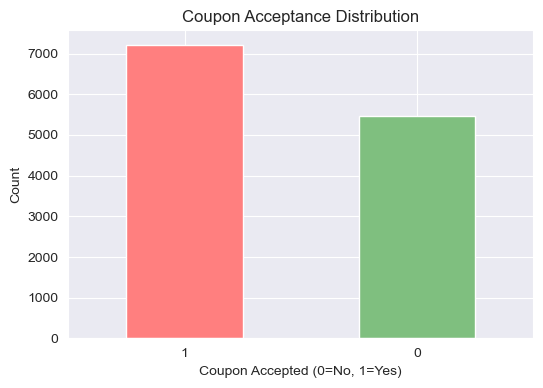

In [25]:
# Bar plot
plt.figure(figsize=(6, 4))
acceptance_counts = data['Y'].value_counts()
acceptance_counts.plot(kind='bar', color=['#ff7f7f', '#7fbf7f'])
plt.title('Coupon Acceptance Distribution')
plt.xlabel('Coupon Accepted (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


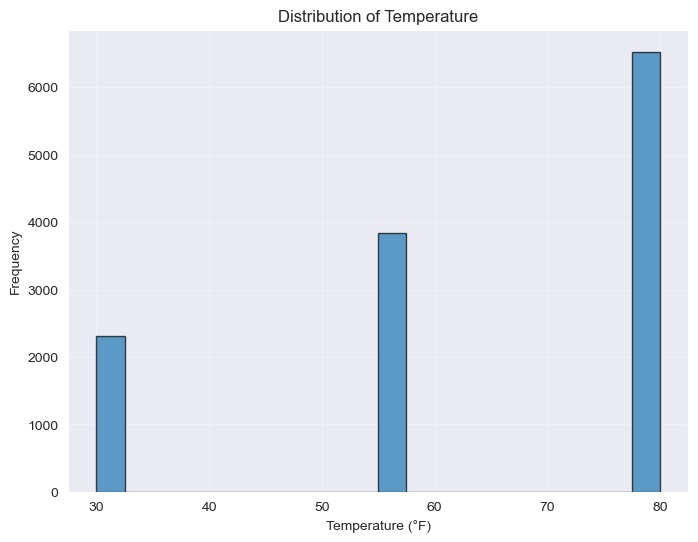

Temperature statistics:
count    12684.000000
mean        63.301798
std         19.154486
min         30.000000
25%         55.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: temperature, dtype: float64

Unique temperature values: [30, 55, 80]


In [26]:
# Use a histogram to visualize the temperature column
plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Additional analysis
print("Temperature statistics:")
print(data['temperature'].describe())
print(f"\nUnique temperature values: {sorted(data['temperature'].unique())}")

In [39]:
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more
print("Bar frequency values in dataset:")
print(bar_coupons['Bar'].value_counts())

# Create groups: 3 or fewer vs more than 3
bar_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
acceptance_3_or_fewer = bar_3_or_fewer['Y'].mean()
acceptance_more_than_3 = bar_more_than_3['Y'].mean()

print(f"\nBar 3 or fewer times a month:")
print(f"  Count: {len(bar_3_or_fewer)}")
print(f"  Acceptance rate: {acceptance_3_or_fewer:.4f} ({acceptance_3_or_fewer*100:.2f}%)")

print(f"\nBar more than 3 times a month:")
print(f"  Count: {len(bar_more_than_3)}")
print(f"  Acceptance rate: {acceptance_more_than_3:.4f} ({acceptance_more_than_3*100:.2f}%)")

print(f"\nDifference: {acceptance_more_than_3 - acceptance_3_or_fewer:.4f}")
print(f"Ratio: {acceptance_more_than_3 / acceptance_3_or_fewer:.2f}x higher")

Bar frequency values in dataset:
Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

Bar 3 or fewer times a month:
  Count: 1797
  Acceptance rate: 0.3706 (37.06%)

Bar more than 3 times a month:
  Count: 199
  Acceptance rate: 0.7688 (76.88%)

Difference: 0.3982
Ratio: 2.07x higher


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [28]:
# Create a new DataFrame that contains just the bar coupons
bar_coupons = data[data['coupon'] == 'Bar']

print(f"Total observations: {len(data)}")
print(f"Bar coupon observations: {len(bar_coupons)}")
print(f"Percentage of bar coupons: {len(bar_coupons)/len(data)*100:.2f}%")

# Display first few rows
print("\nFirst 5 bar coupon observations:")
print(bar_coupons.head())



Total observations: 12684
Bar coupon observations: 2017
Percentage of bar coupons: 15.90%

First 5 bar coupon observations:
        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   Restaur

In [29]:
acceptance_rate = bar_coupons['Y'].mean()
total_accepted = bar_coupons['Y'].sum()
total_observations = len(bar_coupons)

print(f"Total observations: {total_observations}")
print(f"Coupons accepted: {total_accepted}")
print(f"Coupons not accepted: {total_observations - total_accepted}")
print(f"Acceptance rate: {acceptance_rate:.4f} ({acceptance_rate*100:.2f}%)")

Total observations: 2017
Coupons accepted: 827
Coupons not accepted: 1190
Acceptance rate: 0.4100 (41.00%)


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [40]:
print("Bar frequency values in dataset:")
print(bar_coupons['Bar'].value_counts())

# Create groups: 3 or fewer vs more than 3
bar_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
acceptance_3_or_fewer = bar_3_or_fewer['Y'].mean()
acceptance_more_than_3 = bar_more_than_3['Y'].mean()

print(f"\nBar 3 or fewer times a month:")
print(f"  Count: {len(bar_3_or_fewer)}")
print(f"  Acceptance rate: {acceptance_3_or_fewer:.4f} ({acceptance_3_or_fewer*100:.2f}%)")

print(f"\nBar more than 3 times a month:")
print(f"  Count: {len(bar_more_than_3)}")
print(f"  Acceptance rate: {acceptance_more_than_3:.4f} ({acceptance_more_than_3*100:.2f}%)")

print(f"\nDifference: {acceptance_more_than_3 - acceptance_3_or_fewer:.4f}")
print(f"Ratio: {acceptance_more_than_3 / acceptance_3_or_fewer:.2f}x higher")

Bar frequency values in dataset:
Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

Bar 3 or fewer times a month:
  Count: 1797
  Acceptance rate: 0.3706 (37.06%)

Bar more than 3 times a month:
  Count: 199
  Acceptance rate: 0.7688 (76.88%)

Difference: 0.3982
Ratio: 2.07x higher


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [41]:
print("Unique age values:")
print(bar_coupons['age'].value_counts())
condition2 = (
        (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
        (~bar_coupons['age'].isin(['below21', '21']))  # Under 30 (assuming 26 means 26-30)
)
specific_group = bar_coupons[condition2]
other_group = bar_coupons[~bar_coupons.index.isin(specific_group.index)]
# Calculate acceptance rates
specific_acceptance = specific_group['Y'].mean()
other_acceptance = other_group['Y'].mean()

print(f"\nSpecific group (go to a bar more than once a month and are over the age of 25):")
print(f"  Count: {len(specific_group)}")
print(f"  Acceptance rate: {specific_acceptance:.4f} ({specific_acceptance*100:.2f}%)")

print(f"\nAll other bar coupon recipients:")
print(f"  Count: {len(other_group)}")
print(f"  Acceptance rate: {other_acceptance:.4f} ({other_acceptance*100:.2f}%)")


Unique age values:
age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

Specific group (go to a bar more than once a month and are over the age of 25):
  Count: 420
  Acceptance rate: 0.6952 (69.52%)

All other bar coupon recipients:
  Count: 1597
  Acceptance rate: 0.3350 (33.50%)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [32]:
# Compare acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
print("Unique passenger values:")
print(bar_coupons['passanger'].value_counts())
print("\nUnique occupation values:")
print(bar_coupons['occupation'].value_counts())

# Define the specific group
specific_group = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
    (bar_coupons['passanger'] != 'Kid(s)') &  # Passengers not kids
    (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))  # Not farming/fishing/forestry
    ]

# Define the comparison group (all others)
other_group = bar_coupons[~bar_coupons.index.isin(specific_group.index)]

# Calculate acceptance rates
specific_acceptance = specific_group['Y'].mean()
other_acceptance = other_group['Y'].mean()

print(f"\nSpecific group (bar >1/month, no kids, not farming/fishing/forestry):")
print(f"  Count: {len(specific_group)}")
print(f"  Acceptance rate: {specific_acceptance:.4f} ({specific_acceptance*100:.2f}%)")

print(f"\nAll other bar coupon recipients:")
print(f"  Count: {len(other_group)}")
print(f"  Acceptance rate: {other_acceptance:.4f} ({other_acceptance*100:.2f}%)")

print(f"\nDifference: {specific_acceptance - other_acceptance:.4f}")
if other_acceptance > 0:
    print(f"Ratio: {specific_acceptance / other_acceptance:.2f}x")

Unique passenger values:
passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

Unique occupation values:
occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                   

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [33]:
# Compare acceptance rates for the complex OR conditions
print("Unique age values:")
print(bar_coupons['age'].value_counts())
print("\nUnique marital status values:")
print(bar_coupons['maritalStatus'].value_counts())
print("\nUnique income values:")
print(bar_coupons['income'].value_counts())
print("\nUnique RestaurantLessThan20 values:")
print(bar_coupons['RestaurantLessThan20'].value_counts())

# Define the three conditions
condition1 = (
        (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
        (bar_coupons['passanger'] != 'Kid(s)') &  # Not kids
        (bar_coupons['maritalStatus'] != 'Widowed')  # Not widowed
)

condition2 = (
        (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # More than once a month
        (bar_coupons['age'].isin(['below21', '21', '26']))  # Under 30 (assuming 26 means 26-30)
)

condition3 = (
        (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  # More than 4 times a month
        (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499']))  # Less than 50K
)

# Create the combined group (OR condition)
target_group = bar_coupons[condition1 | condition2 | condition3]

# Create comparison group (all others)
other_group = bar_coupons[~bar_coupons.index.isin(target_group.index)]

# Calculate acceptance rates
target_acceptance = target_group['Y'].mean()
other_acceptance = other_group['Y'].mean()

print(f"\nCondition 1 count: {condition1.sum()}")
print(f"Condition 2 count: {condition2.sum()}")
print(f"Condition 3 count: {condition3.sum()}")

print(f"\nTarget group (meeting any of the 3 conditions):")
print(f"  Count: {len(target_group)}")
print(f"  Acceptance rate: {target_acceptance:.4f} ({target_acceptance*100:.2f}%)")

print(f"\nAll other bar coupon recipients:")
print(f"  Count: {len(other_group)}")
print(f"  Acceptance rate: {other_acceptance:.4f} ({other_acceptance*100:.2f}%)")

print(f"\nDifference: {target_acceptance - other_acceptance:.4f}")
if other_acceptance > 0:
    print(f"Ratio: {target_acceptance / other_acceptance:.2f}x")

Unique age values:
age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

Unique marital status values:
maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

Unique income values:
income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

Unique RestaurantLessThan20 values:
RestaurantLessThan20
1~3      878
4~8      568
less1    325
gt8      186
never     37
Name: count, dtype: int64

Condition 1 count: 551
Condition 2 count: 345
Condition 3 count: 246

Target group (meeting any of the 3 conditions):
  Count: 714
  Acceptance rate: 0.6148 (61.48%)

All other bar coupon recipients:
  Count: 1303

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [38]:
print("HYPOTHESIS ABOUT DRIVERS WHO ACCEPTED BAR COUPONS:")
print("="*60)

print("""
Based on the analysis above, I hypothesize that drivers who accepted bar coupons tend to have the following characteristics:

1. BAR VISITING FREQUENCY:
   - Drivers who go to bars more frequently (more than 3 times a month) are significantly
     more likely to accept bar coupons than those who go less frequently or never.
   - This suggests that familiarity and comfort with bar environments increases acceptance.

2. AGE DEMOGRAPHICS:
   - Younger drivers (under 30) show higher acceptance rates, likely due to:
     * Greater social activity and nightlife participation
     * More flexible schedules and spontaneous decision-making
     * Higher comfort level with bar environments

3. SOCIAL CONTEXT:
   - Drivers without children as passengers are more likely to accept bar coupons
   - This makes sense as bars are adult-oriented venues and having kids would be a barrier
   - Social situations matter - drivers alone or with adult companions are more receptive

4. LIFESTYLE AND INCOME:
   - Drivers who frequently visit cheap restaurants (>4 times/month) with lower income (<$50K)
     show higher acceptance rates
   - This suggests price-conscious consumers who eat out frequently are attracted to deals
   - Budget-conscious lifestyle aligns with coupon usage behavior

5. OCCUPATION:
   - Non-agricultural workers (not farming/fishing/forestry) show different patterns
   - Possibly due to different work schedules and social norms

KEY HYPOTHESIS:
Drivers who accept bar coupons are likely younger, socially active individuals who:
- Already have established bar-going habits
- Are traveling without children
- Are price-conscious and deal-seeking
- Have flexible lifestyles that allow for spontaneous decisions
""")

print("\nThis suggests that bar coupon marketing should target:")
print("- Frequent bar patrons who are already comfortable with the venue type")
print("- Younger demographics without family constraints")
print("- Price-conscious consumers who eat out regularly")
print("- Times/situations when people are traveling without children")


HYPOTHESIS ABOUT DRIVERS WHO ACCEPTED BAR COUPONS:

Based on the analysis above, I hypothesize that drivers who accepted bar coupons tend to have the following characteristics:

1. BAR VISITING FREQUENCY:
   - Drivers who go to bars more frequently (more than 3 times a month) are significantly
     more likely to accept bar coupons than those who go less frequently or never.
   - This suggests that familiarity and comfort with bar environments increases acceptance.

2. AGE DEMOGRAPHICS:
   - Younger drivers (under 30) show higher acceptance rates, likely due to:
     * Greater social activity and nightlife participation
     * More flexible schedules and spontaneous decision-making
     * Higher comfort level with bar environments

3. SOCIAL CONTEXT:
   - Drivers without children as passengers are more likely to accept bar coupons
   - This makes sense as bars are adult-oriented venues and having kids would be a barrier
   - Social situations matter - drivers alone or with adult compan

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  